# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hilmi Naufal Ramadhani
- **Email:** m258d4ky2149@bangkit.academy
- **ID Dicoding:** hilminaufalr

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana korelasi antara kondisi cuaca (misalnya suhu, kelembaban, kecepatan angin) dengan jumlah sewa sepeda secara jam per jam dalam dataset yang diberikan?
- Pertanyaan 2: Pada musim apa sepeda paling banyak dan paling sedikit dirental?
- Pertanyaan 3: Bagaimana performa penyewaan rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Import data dari tabel day.csv dan hour.csv

In [5]:
day_df= pd.read_csv('Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df=pd.read_csv('Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Tabel day

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tabel day_df Missing Value Check

In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah Duplikasi : ", day_df.duplicated().sum())

Jumlah Duplikasi :  0


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Tabel hour_df

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tabel hour_df Missing Value Check

In [23]:
hour_df.isna().sum()

instant       0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
total         0
dtype: int64

In [24]:
print("Jumlah Duplikasi : ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah Duplikasi :  0


,instant,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,total
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Membersihkan Tabel day_df

Menghapus kolom yang tidak dibutuhkan

In [25]:
day_col_drop = ['windspeed', 'weekday']
day_df.drop(day_col_drop, axis=1, inplace=True)

day_df.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


Column yang dihapus karena tidak diperlukan dalam analisa pertanyaan bisnis

- windspeed: berisi informasi kecepatan angin dan tidak dibutuhkan untuk analisa
- weekday: berisi informasi tentang hari dari data dan tidak dibutuhkan dalam analisa karena sudah ada nilai workingday dan holiday

Merubah penamaan kolom

In [26]:
day_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'weathersit' : 'weather',
    'cnt' : 'total'
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


Mapping nilai kolom berupa angka menjadi keterangan

In [27]:
#mapping kolom season
mapping_season = {
    1: 'springer', 2: 'summer',
    3: 'fall', 4: 'winter'
}
day_df['season'] = day_df['season'].map(mapping_season)

#mapping kolom tahun
mapping_year = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(mapping_year)

#mapping kolom bulan
mapping_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'   
}
day_df['month'] = day_df['month'].map(mapping_month)

#mapping kolom weather
mapping_weather = {
    1: 'Clear', 2: 'Mist',
    3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}
day_df['weather'] = day_df['weather'].map(mapping_weather)


day_df.head()

,instant,date,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,springer,2011,Jan,0,0,Mist,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,springer,2011,Jan,0,0,Mist,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,springer,2011,Jan,0,1,Clear,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,springer,2011,Jan,0,1,Clear,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,springer,2011,Jan,0,1,Clear,0.226957,0.229270,0.436957,82,1518,1600


Memperbaiki tipe data

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    object 
 3   year        731 non-null    int64  
 4   month       731 non-null    object 
 5   holiday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  total       731 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 80.1+ KB


In [29]:
#merubah tipe data kolom ke datetime
day_df["date"] = pd.to_datetime(day_df["date"])

#merubah tipe data kolom ke category
day_df['season'] = day_df['season'].astype('category')
day_df['year'] = day_df['year'].astype('category')
day_df['month'] = day_df['month'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weather'] = day_df['weather'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  total       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.2 KB


Membersihkan tabel hour_df

In [30]:
hour_col_drop = ['windspeed', 'weekday']
hour_df.drop(hour_col_drop, axis=1, inplace=True)

hour_df.head()

,instant,date,season,year,month,hour,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


Merubah penamaan kolom

In [31]:
hour_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather',
    'cnt' : 'total'
}, inplace=True)

hour_df.head()

,instant,date,season,year,month,hour,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


Mapping nilai kolom berupa angka menjadi keterangan

In [32]:
hour_df['season'] = hour_df['season'].map(mapping_season)
hour_df['year'] = hour_df['year'].map(mapping_year)
hour_df['month'] = hour_df['month'].map(mapping_month)
hour_df['weather'] = hour_df['weather'].map(mapping_weather)

hour_df.head()

,instant,date,season,year,month,hour,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,springer,2011,Jan,0,0,0,Clear,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,springer,2011,Jan,1,0,0,Clear,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,springer,2011,Jan,2,0,0,Clear,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,springer,2011,Jan,3,0,0,Clear,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,springer,2011,Jan,4,0,0,Clear,0.24,0.2879,0.75,0,1,1


Memperbaiki tipe data

In [33]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   year        17379 non-null  int64  
 4   month       17379 non-null  object 
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weather     17379 non-null  object 
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  total       17379 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 2.0+ MB


In [34]:
#merubah tipe data kolom ke datetime
hour_df["date"] = pd.to_datetime(hour_df["date"])

#merubah tipe data kolom ke category
hour_df['season'] = hour_df['season'].astype('category')
hour_df['year'] = hour_df['year'].astype('category')
hour_df['month'] = hour_df['month'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weather'] = hour_df['weather'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  total       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.2 KB


## Exploratory Data Analysis (EDA)

### Explore tabel day_df

Eksplore jumlah total rental setiap bulan

In [35]:
day_df.groupby(by=['year', 'month']).agg({
    'total': ['sum', 'max', 'min', 'mean']
})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19076\1422170717.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['year', 'month']).agg({


total                         
               sum   max   min         mean
year month                                 
2011 Apr     94870  5312   795  3162.333333
     Aug    136691  5895  1115  4409.387097
     Dec     87323  3940   705  2816.870968
     Feb     48215  2927  1005  1721.964286
     Jan     38189  1985   431  1231.903226
     Jul    141341  6043  3285  4559.387097
     Jun    143512  5515  3767  4783.733333
     Mar     64045  3239   605  2065.967742
     May    135821  5805  2633  4381.322581
     Nov    102167  4486  1495  3405.566667
     Oct    123511  5511   627  3984.225806
     Sep    127418  5423  1842  4247.266667
2012 Apr    174224  7460  1027  5807.466667
     Aug    214503  7865  4549  6919.451613
     Dec    123713  6606   441  3990.741935
     Feb    103137  5062  1529  3556.448276
     Jan     96744  4521  1301  3120.774194
     Jul    203607  8173  4459  6567.967742
     Jun    202830  8120  4127  6761.000000
     Mar    164875  8362  3194  5318.548387
     May    195865  8294  2843  6318.225806
     Nov    152664  6852  2277  5088.800000
     Oct    198841  8156    22  6414.225806
     Sep    218573  8714  4073  7285.766667

In [36]:
day_df_total_bulanan = day_df.groupby(by='month', observed=False).agg({
    'total': ['sum', 'max', 'min', 'mean']
})
day_df_total_bulanan.columns = day_df_total_bulanan.columns.droplevel(0)
day_df_total_bulanan.sort_values(by='sum', ascending=False)

,sum,max,min,mean
month,,,,
Aug,351194,7865,1115,5664.419355
Jun,346342,8120,3767,5772.366667
Sep,345991,8714,1842,5766.516667
Jul,344948,8173,3285,5563.677419
May,331686,8294,2633,5349.774194
Oct,322352,8156,22,5199.225806
Apr,269094,7460,795,4484.900000
Nov,254831,6852,1495,4247.183333
Mar,228920,8362,605,3692.258065


Agustus bulan dengan total penyewaan terbanyak, dilanjutkan dengan bulan Juni dan September.

Eksplore jumlah total rental pada setiap musim

In [37]:
day_df.groupby(by='season', observed=False).agg({
    'total': ['sum', 'max', 'min', 'mean'],
    'temp' : ['mean', 'max', 'min', 'std'],
    'atemp': ['mean', 'max', 'min', 'std'],
    'hum' : ['mean', 'max', 'min', 'std'],
})


total                               temp                      \
              sum   max   min         mean      mean       max       min   
season                                                                     
fall      1061129  8714  1115  5644.303191  0.706309  0.861667  0.469167   
springer   471348  7836   431  2604.132597  0.297748  0.572500  0.059130   
summer     918589  8362   795  4992.331522  0.544405  0.808333  0.253043   
winter     841613  8555    22  4728.162921  0.422906  0.657500  0.220833   

                       atemp                                     hum  \
               std      mean       max       min       std      mean   
season                                                                 
fall      0.070848  0.655898  0.840896  0.242400  0.072056  0.633482   
springer  0.102735  0.296914  0.548617  0.079070  0.099026  0.582903   
summer    0.122650  0.520307  0.757579  0.250339  0.108022  0.626948   
winter    0.107834  0.415539  0.607975  0.227913  0.095536  0.668719   

                                        
               max       min       std  
season                                  
fall      0.939565  0.360000  0.119349  
springer  0.948261  0.000000  0.151880  
summer    0.922500  0.254167  0.152841  
winter    0.972500  0.333478  0.131248

In [38]:
day_df.groupby('season', observed=False)[['registered', 'casual']].sum().reset_index()

,season,registered,casual
0,fall,835038,226091
1,springer,410726,60622
2,summer,715067,203522
3,winter,711831,129782


Eksplore pengaruh cuaca terhadap jumlah total rental

In [39]:
day_df.groupby(by='weather', observed=False).agg({
    'total': ['sum', 'max', 'min', 'mean']
})

total                        
                     sum   max  min         mean
weather                                         
Clear            2257952  8714  431  4876.786177
Light Rain/Snow    37869  4639   22  1803.285714
Mist              996858  8362  605  4035.862348

In [40]:
day_df.groupby('weather', observed=False)[['registered', 'casual']].sum().reset_index()

,weather,registered,casual
0,Clear,1811606,446346
1,Light Rain/Snow,33974,3895
2,Mist,827082,169776


penyewaan terbanyak terjadi ketika cuaca sedang cerah.

Explore tabel hour_df

Eksplore jumlah total rental tiap jam pada hari kerja

In [41]:
filter_workingday = hour_df[(hour_df["workingday"] == 1)]
hour_df_workingday = filter_workingday.groupby(by='hour').agg({
    'total': ['sum', 'max', 'min', 'mean']
})
hour_df_workingday.columns = hour_df_workingday.columns.droplevel(0)
hour_df_workingday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hour,,,,
17,262120,976,26,525.290581
18,245129,977,26,492.226908
8,236595,839,31,477.006048
19,173504,743,18,348.401606
16,146268,634,13,293.122244
7,144144,596,18,290.612903
20,124360,567,23,249.718876
9,119793,426,23,241.518145
15,100263,601,13,201.331325


total penyewaan sepeda terbanyak terjadi pada sore hari berkisar pada pukul 16.00 - 20.00 dan pada pagi hari berkisar pukul 07.00 - 09.00

Eksplore jumlah total rental tiap jam pada hari libur

In [42]:
filter_holiday = hour_df[(hour_df["holiday"] == 1)|(hour_df["workingday"] == 0)]
hour_df_holiday = filter_holiday.groupby(by='hour').agg({
    'total': ['sum', 'max', 'min', 'mean']
})
hour_df_holiday.columns = hour_df_holiday.columns.droplevel(0)
hour_df_holiday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hour,,,,
13,86101,760,30,372.731602
12,84606,776,32,366.259740
14,84233,750,23,364.645022
15,82886,750,7,358.813853
16,81480,783,11,352.727273
17,74740,731,15,323.549784
11,72838,663,27,315.316017
18,64643,676,23,281.056522
10,59115,539,12,255.909091


total penyewaan sepeda terbanyak terjadi pada siang hingga sore hari bekisar pada pukul 12.00 - 16.00

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana korelasi antara kondisi cuaca (suhu, kelembaban, kecepatan angin) dengan jumlah sewa sepeda secara jam dalam dataset yang diberikan? 

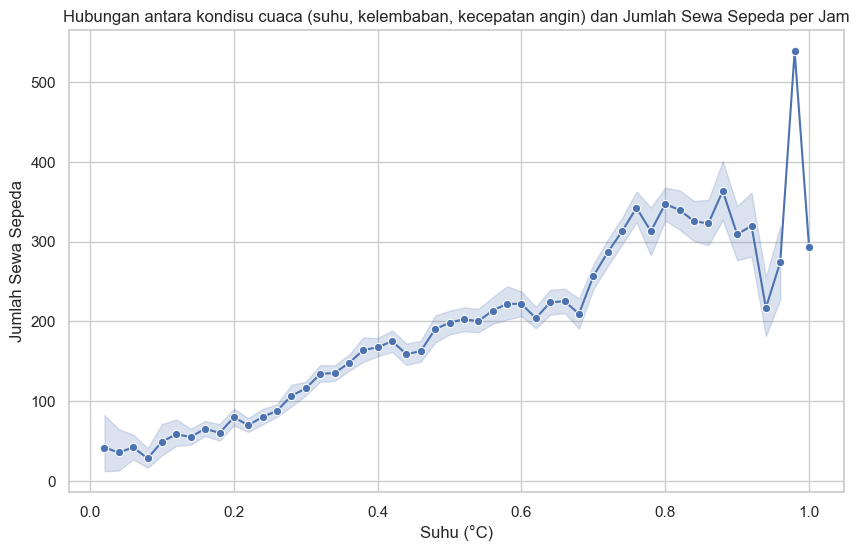

In [43]:
# Membuat line chart
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.lineplot(
    data=hour_df, 
    x='temp',  # Menggunakan suhu sebagai sumbu x
    y='total',  # Menggunakan jumlah sewa sepeda sebagai sumbu y
    marker='o'
)
plt.title("Hubungan antara kondisu cuaca (suhu, kelembaban, kecepatan angin) dan Jumlah Sewa Sepeda per Jam")
plt.xlabel("Suhu (°C)")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()


### Pertanyaan 2: Pada musim apa sepeda paling banyak dan paling sedikit dirental?

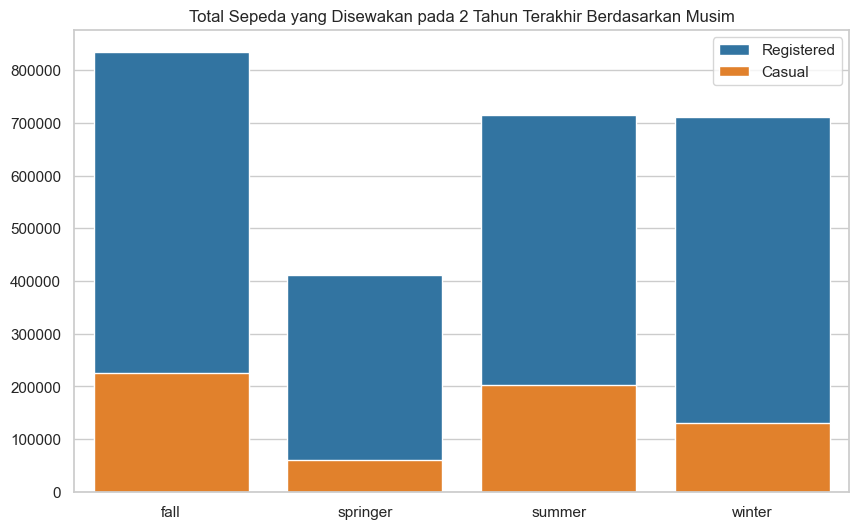

In [44]:
#membuat variabel total data pelanggan registered dan kasual setiap season
plot_season = day_df.groupby('season', observed=False)[['registered', 'casual']].sum().reset_index()

# membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_season, 
    x='season', 
    y='registered', 
    label='Registered', 
    color='tab:blue'
)
sns.barplot(
    data=plot_season, 
    x='season', 
    y='casual', 
    label='Casual', 
    color='tab:orange'
)
plt.title('Total Sepeda yang Disewakan pada 2 Tahun Terakhir Berdasarkan Musim')
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

total penyewaan sepeda paling banyak terjadi pada musim fall baik untuk pelanggan casual maupun pelanggan yang sudah registered. Sebaliknya total penyewaaan sepeda paling sedikit terjadi pada musing springer.

### Pertanyaan 3 : Bagaimana performa penyewaan rental sepeda?

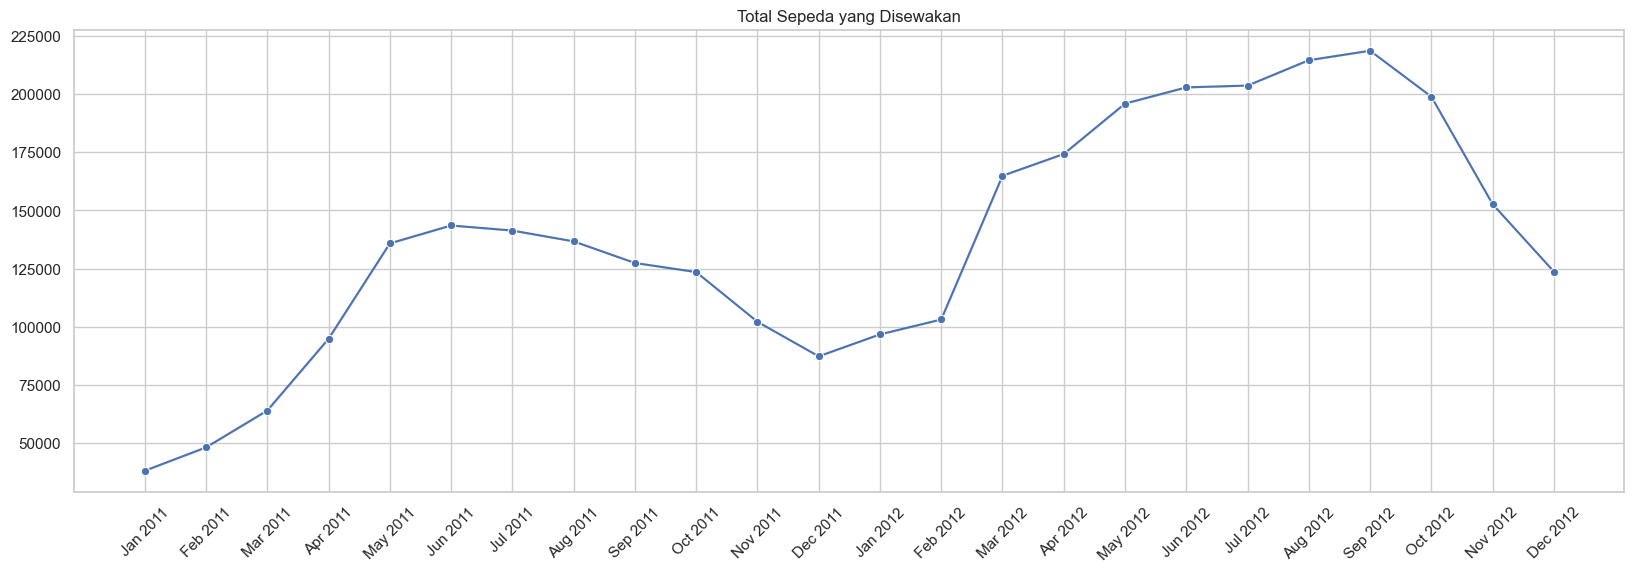

In [45]:
#menggganti datatype untuk merge kolom
plot_month = day_df['month'].astype(str)
plot_year = day_df['year'].astype(str)

#merging kolom month dan year untuk plot
day_df['year_month'] = plot_month + ' ' + plot_year

# membuat kolom berisi sum data kolom 'total' untuk setiap 'year_month'
day_df['total_sum'] = day_df.groupby('year_month')['total'].transform('sum')

# membuat line chart
plt.figure(figsize=(20, 6))
sns.set(style='whitegrid')
sns.lineplot(
    data=day_df, 
    x='year_month', 
    y='total_sum',  
    marker='o'
)
plt.title("Total Sepeda yang Disewakan")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.show()

terjadi peningkatan minat penyewaan sepeda yang cukup tinggi di tahun 2012 apabila dibandingkan dengan tahun sebelumnya.

## Conclusion

- Conclution pertanyaan 1 : korelasi antara kondisi cuaca (kelembaban, suhu, dan kondisi cuaca) dengan jumlah sewa sepeda per jam cenderung lemah. Variabel waktu dalam sehari tampaknya memiliki pengaruh yang lebih besar terhadap pola peminjaman sepeda.
- Conclution pertanyaan 2 : Penyewaan sepeda terbanyak terjadi pada musim fall dan penyewaan sepeda paling sedikit terjadi pada musim summer.
- Conclution pertanyaan 3 : secara keseluruhan performa penyewaan sepeda berada dalam tren yang positif